In [4]:
# In[0]: IMPORTS
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

#['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
#Classes:
#classes 0 -> 9: số 0 đến 9.
#10: A
#11: B
#12: c, C
#13: D
#14: E
#15: F
#16: G
#17: H
#18: i, I
#19: j, J
#20: k, K
#21: l, L
#22: m, M
#23: N 
#24: o, O
#25: p, P 
#26: Q
#27: R
#28: s, S
#29: T 
#30: u, U
#31: v, V 
#32: w, W 
#33: x, X
#34: y, Y 
#35: z, Z
#36: a
#37: b
#38: d
#39: e
#40: f 
#41: g
#42: h
#43: n
#44: q
#45: r
#46: t


In [2]:
# 1.3. Plot a digit image
#Function để vẽ hình ra
#Chỉ cần đưa mảng 2 chiều của một hình, nó sẽ vẽ được hình hoàn chỉnh.
#Trước khi vẽ, cần kéo mảng 1 chiều thành mảng 2 chiều 28*28 pixel.
def plot_digit(data, label = 'unspecified'):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.title("letter: " + str(label))
    #plt.axis("off")
    plt.show()

In [3]:
# MERGE CLASS 15 AND 40 (F & f)

if 0:
    y_train = np.array([])
    y_test = np.array([])
    for i in range (0, y_train_before.size):
        if y_train_before[i] == 40:
            y_train = np.append(y_train, [15])
        elif y_train_before[i] == 24:
            y_train = np.append(y_train, [0])
        else:
            y_train = np.append(y_train, [y_train_before[i]])
    joblib.dump(y_train, 'saved_var/data/y_train')
    for i in range (0, y_test_before.size):
        if y_test_before[i] == 40:
            y_test = np.append(y_test, [15])
        elif y_train_before[i] == 24:
            y_train = np.append(y_train, [0])
        else:
            y_test = np.append(y_test, [y_test_before[i]])
    joblib.dump(y_test, 'saved_var/data/y_test')
# else:
#     y_train = joblib.load('saved_var/data/y_train')
#     y_test = joblib.load('saved_var/data/y_test')

print('done')

done


In [5]:
print("Scale Train Set")
from sklearn.preprocessing import StandardScaler
if 0:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
    joblib.dump(X_train_scaled, 'saved_var/data/X_train_scaled')
else:
    X_train_scaled = joblib.load('saved_var/data/X_train_scaled')
    y_train = joblib.load('saved_var/data/y_train')
print('done')

Scale Train Set
done


In [6]:
print("Scale Test Set")
from sklearn.preprocessing import StandardScaler
if 0:
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
    joblib.dump(X_test_scaled, 'saved_var/data/X_test_scaled')
else:
    X_test_scaled = joblib.load('saved_var/data/X_test_scaled')
    y_test = joblib.load('saved_var/data/y_test')
print('done')

Scale Test Set
done


In [7]:
X_train_300000 = X_train_scaled[:300000]
y_train_300000 = y_train[:300000]
print('done')

done


In [13]:
from sklearn import svm, metrics
if 1:
    svm_clf = svm.SVC(decision_function_shape='ovo', C=1, kernel='rbf', gamma='scale')
    svm_clf.fit(X_train_300000, y_train_300000)
    joblib.dump(svm_clf, 'saved_var/svm_clf')
else:
    svm_clf = joblib.load('saved_var/svm_clf')
print('done')

done


In [9]:
from sklearn.model_selection import cross_val_score
if 1:
    svm_acc_val = cross_val_score(svm_clf, X_train_300000, y_train_300000, cv=3, n_jobs=-1, scoring="accuracy")
    joblib.dump(svm_acc_val,'saved_var/svm_acc_val')
else:
    svm_acc_val = joblib.load('saved_var/svm_acc_val')
print('SVM validation accuraccy')
print(svm_acc_val)

SVM validation accuraccy
[0.85316 0.85457 0.85431]


In [18]:
#Accuracy score on test set
from sklearn.metrics import mean_squared_error
#predict_300k = svm_clf.predict(X_test_scaled)
joblib.dump(predict_300k, 'saved_var/predict_normal')
mse = mean_squared_error(y_test, predict_300k)
rmse = np.sqrt(mse)
print("Root mean squared Error:")
print(rmse)


Root mean squared Error:
8.003404126892244


In [7]:
from sklearn import svm, metrics
if 0:
    clf = svm.SVC(decision_function_shape='ovo', C=7, kernel='rbf', gamma='scale')
    clf.fit(X_train_300000, y_train)
    joblib.dump(clf, 'saved_var/svm_clf_best_parameter')
else:
    clf = joblib.load('saved_var/svm_clf_best_parameter')
print('done')

done


In [19]:
print("Accuracy score with best parameter:")
if 0:
    predict = clf.predict(X_test_scaled)
    ac_score = metrics.accuracy_score(y_test, predict)
    cl_report = metrics.classification_report(y_test, predict)
    joblib.dump(predict, 'saved_var/predict_best_parameter')
    joblib.dump(ac_score, 'saved_var/ac_score_best_parameter') 
    joblib.dump(cl_report, 'saved_var/cl_report_best_parameter')
else:
    predict = joblib.load('saved_var/predict_best_parameter')
    ac_score = joblib.load('saved_var/ac_score_best_parameter')
    cl_report = joblib.load('saved_var/cl_report_best_parameter')

print("Score = ", ac_score)
print(cl_report)

Accuracy score On 300k samples:
Score =  0.8719857637784445
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.73      5745
         1.0       0.66      0.93      0.77      6400
         2.0       0.93      0.96      0.94      5765
         3.0       0.97      0.98      0.98      5827
         4.0       0.94      0.96      0.95      5498
         5.0       0.92      0.90      0.91      5326
         6.0       0.96      0.97      0.96      5787
         7.0       0.97      0.98      0.98      5873
         8.0       0.94      0.96      0.95      5655
         9.0       0.92      0.97      0.94      5651
        10.0       0.88      0.88      0.88      1058
        11.0       0.85      0.73      0.79       652
        12.0       0.94      0.93      0.93      2156
        13.0       0.82      0.75      0.78       735
        14.0       0.96      0.84      0.90       860
        15.0       0.92      0.89      0.91      1950
        16.0       0.

In [18]:
print("Accuracy score:")
if 0:
    predict = clf.predict(X_test_scaled)
    ac_score = metrics.accuracy_score(y_test, predict)
    cl_report = metrics.classification_report(y_test, predict)
    joblib.dump(predict, 'saved_var/predict')
    joblib.dump(ac_score, 'saved_var/ac_score') 
    joblib.dump(cl_report, 'saved_var/cl_report')
else:
    predict = joblib.load('saved_var/predict')
    ac_score = joblib.load('saved_var/ac_score')
    cl_report = joblib.load('saved_var/cl_report')

print("Score = ", ac_score)
print(cl_report)

Accuracy score:
Score =  0.8355097444185586
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73      5745
         1.0       0.63      0.95      0.76      6400
         2.0       0.88      0.94      0.91      5765
         3.0       0.95      0.96      0.95      5827
         4.0       0.90      0.94      0.92      5498
         5.0       0.87      0.86      0.87      5326
         6.0       0.92      0.96      0.94      5787
         7.0       0.96      0.96      0.96      5873
         8.0       0.90      0.93      0.91      5655
         9.0       0.89      0.96      0.92      5651
        10.0       0.84      0.78      0.81      1058
        11.0       0.81      0.56      0.66       652
        12.0       0.91      0.88      0.89      2156
        13.0       0.79      0.64      0.71       735
        14.0       0.93      0.74      0.83       860
        15.0       0.87      0.83      0.85      1950
        16.0       0.89      0.54    

In [5]:
precisions = np.array([0.70,0.66,0.93,0.97,0.94,0.92,0.96,0.97,0.94,0.92,0.88,0.85,0.94,0.82,0.96,0.92,0.88,0.93,0.67,0.90,0.89,0.75,0.89,0.91,0.69,0.92,0.83,0.88,0.87,0.88,0.92,0.91,0.58,0.95,0.85,0.82,0.89,0.88,0.93,0.96,0.70,0.92,0.93,0.78,0.95,0.92,])
recalls = np.array([0.78,0.93,0.96,0.98,0.96,0.90,0.97,0.98,0.96,0.97,0.88,0.73,0.93,0.75,0.84,0.89,0.72,0.81,0.50,0.81,0.83,0.31,0.94,0.91,0.61,0.92,0.72,0.84,0.90,0.88,0.92,0.89,0.93,0.88,0.76,0.72,0.87,0.81,0.92,0.96,0.39,0.90,0.92,0.26,0.95,0.90])
f1_scores = np.array([0.73,0.77,0.94,0.98,0.95,0.91,0.96,0.98,0.95,0.94,0.88,0.79,0.93,0.78,0.90,0.91,0.79,0.86,0.58,0.85,0.86,0.44,0.91,0.91,0.65,0.92,0.77,0.86,0.88,0.88,0.92,0.90,0.72,0.91,0.80,0.77,0.88,0.85,0.93,0.96,0.50,0.91,0.93,0.40,0.95,0.91])

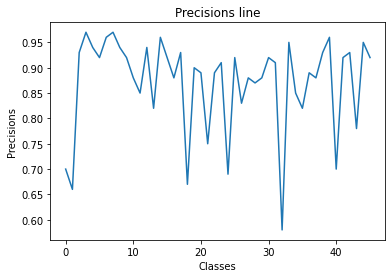

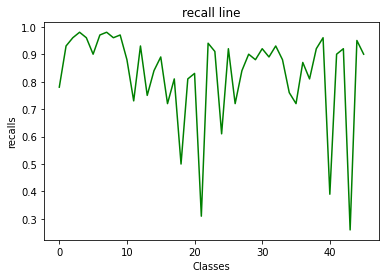

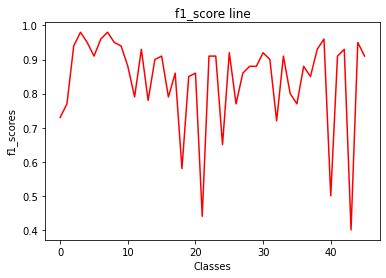

In [7]:
plt.plot(precisions)
plt.ylabel('Precisions')
plt.xlabel('Classes')
plt.title('Precisions line')
plt.show()

plt.plot(recalls, 'g')
plt.ylabel('recalls')
plt.xlabel('Classes')
plt.title('recall line')
plt.show()

plt.plot(f1_scores, 'r')
plt.ylabel('f1_scores')
plt.xlabel('Classes')
plt.title('f1_score line')
plt.show()

In [5]:
### 5.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse
print('Ok')

Ok


In [4]:
# clf = joblib.load('saved_var/svm_clf_300k')

In [6]:
#Calculate on Test set
if 0:
    r2score, rmse = r2score_and_rmse(clf, X_test_scaled, y_test)
    r2score_rmse =[r2score, rmse]
    joblib.dump(r2score_rmse,'saved_var/r2score_rmse_test')
else:
    r2score_rmse =  joblib.load('saved_var/r2score_rmse_test')
    r2score = r2score_rmse[0]
    rmse = r2score_rmse[1]

print('Calculate on Test set')
print('R2 score (on Testing data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
print('===========================================')

Calculate on Test set
R2 score (on Testing data, best=1): 0.8719857637784445
Root Mean Square Error:  7.6


In [13]:
from sklearn.model_selection import cross_val_score
if 0:
    svm_acc_val_best_parameter = cross_val_score(svm_clf_best_parameter, X_train, y_train, cv=3, n_jobs=-1, scoring="accuracy")
    joblib.dump(svm_acc_val_best_parameter,'saved_var/svm_acc_val_best_parameter')
else:
    svm_acc_val_best_parameter = joblib.load('saved_var/svm_acc_val_best_parameter')
print('SVM validation accuraccy with best parameter')
print(svm_acc_val)

SVM validation accuraccy
[0.86381 0.86505 0.86709]


In [3]:
print("Accuracy on test set:")
print(joblib.load('saved_var/ac_score_best_parameter'))

Accuracy on test set:
0.8719857637784445
